<a href="https://colab.research.google.com/github/faithCoder1/Hamoye-DataScience/blob/master/CARBON_REDUCTION_MODEL_TRAINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data5 = pd.read_excel('20tstcar-2021-03-02.xlsx')

In [ ]:
data5.head()

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,...,Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,...,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.2,HASXV05.2AM5,Car,...,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.0,JASXV04.0AES,Car,...,11.26,0.0919,0.0251,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
3,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.0,JASXV04.0AES,Car,...,11.26,0.0919,0.0251,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
4,2020,aston martin,ASX,Aston Martin,DBS,7002PT7056,0,5.2,KASXV05.2AM5,Car,...,6.81,0.0807,0.0245,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


In [ ]:
#DATA_DIRECTORY='C:\\Users\\AYERHAN MSUGHTER\\Downloads\\CO2 Emissions_Canada.csv'
df=pd.read_csv('CO2 Emissions_Canada.csv')

In [ ]:
df.duplicated().sum()

1103

In [ ]:
#Drop Duplicated data
df=df.drop_duplicates()
df.shape

(6282, 12)

In [ ]:
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
model_labels = list(df['Model'].unique())
cylinders_labels1 = list(df['Cylinders'].unique())
cylinders_labels1.sort()
cylinders_labels =[]
for i in cylinders_labels1:
    cylinders_labels.append(str(i))
cylinders_labels 
cylinders_labels

['3', '4', '5', '6', '8', '10', '12', '16']

In [ ]:
len(model_labels)

2053

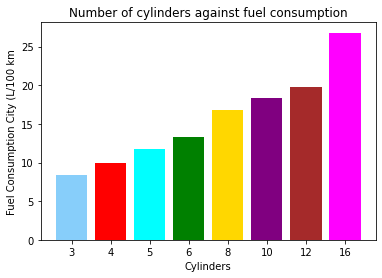

In [ ]:
# Pie chart
labels = cylinders_labels
sizes =[]
for i in list(cylinders_labels1):
    sizes.append(df[df['Cylinders']==i]['Fuel Consumption City (L/100 km)'].mean())
# only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['lightskyblue', 'red', 'cyan', 'green', 'gold','purple','brown','magenta']  
plt.bar(height = sizes,  x=labels,color =colors
     )
plt.ylabel('Fuel Consumption City (L/100 km')
plt.xlabel('Cylinders')
# Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Number of cylinders against fuel consumption')
plt.show()

In [ ]:

def drivetrain(b):
    
    for i in list(df['Model']):
        
        if b in i:
            mean1= df[df['Model']==i]['Fuel Consumption Comb (L/100 km)'].mean()
            
            return mean1
        else:
            pass
    
drivetrain('FFV')            
drivetrain_labels =["FFV",'4WD','AWD','SWB','LWB','EWB']
drive_train_measure =[]
for i in drivetrain_labels:
    drive_train_measure.append(drivetrain(i))
drive_train_measure


[12.45, 11.1, 10.475, 12.75, 12.75, 16.380000000000003]

## We want to know the influence of drive train and drive base on co2 emission

In [ ]:

def drivetrain2(b):
    
    for i in list(df['Model']):
        
        if b in i:
            mean1= df[df['Model']==i]['CO2 Emissions(g/km)'].mean()
            
            return mean1
        else:
            pass
drivetrain_labels =["FFV",'4WD','AWD','SWB','LWB','EWB'] #types of drive train and base
drive_train_measure2 =[]
for i in drivetrain_labels:
    drive_train_measure2.append(drivetrain2(i))
drive_train_measure2



[236.0, 255.0, 243.75, 293.0, 293.0, 379.6]

In [ ]:
def drivetrain2(b):
    
    for i in list(df['Model']):
        
        if b in i:
            mean1= df[df['Model']==i]['CO2 Emissions(g/km)'].mean()
            
            return mean1
        else:
            pass
drivetrain_labels =["FFV",'4WD','AWD','SWB','LWB','EWB'] #types of drive train and base
drive_train_measure2 =[]
for i in drivetrain_labels:
    drive_train_measure2.append(drivetrain2(i))
drive_train_measure2


In [ ]:
data5['Drive System Description'].unique()

array(['2-Wheel Drive, Rear', 'All Wheel Drive', '4-Wheel Drive',
       '2-Wheel Drive, Front', 'Part-time 4-Wheel Drive'], dtype=object)

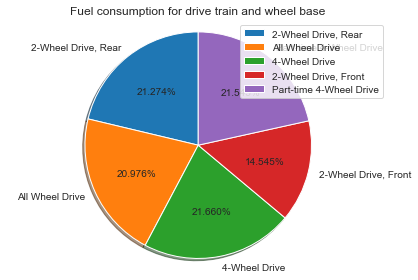

In [ ]:
drivesystemdesc = ['2-Wheel Drive, Rear', 'All Wheel Drive', '4-Wheel Drive',
       '2-Wheel Drive, Front', 'Part-time 4-Wheel Drive']
drive_mode_measure2 =[]
for i in list(drivesystemdesc):
        drive_mode_measure2.append(data5[data5['Drive System Description']==i]['CO2 (g/mi)'].mean())
            
drive_mode_measure2
# drivemode_labels =["FWD",'4WD','AWD','RWD','P4WD'] #types of drive train and base

# for i in drivetrain_labels:
#     drive_mode_measure2.append(drivetrain2(i))
# drive_mode_measure2

# Pie chart
labels = drivesystemdesc
sizes =drive_mode_measure2
# only "explode" the 2nd slice (i.e. 'Hogs')
#colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','purple'] 
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.3f%%',
        shadow=True, startangle=90,)#colors=colors
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.legend(labels,loc='best')
plt.title("Fuel consumption for drive train and wheel base")
plt.tight_layout()
plt.show()

In [ ]:
data5['Transmission Overdrive Desc'].uniqueque()

array(['Top gear ratio < 1', 'No gear ratio < 1'], dtype=object)

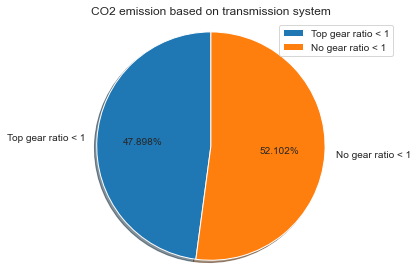

In [ ]:
transmissionsystem = ['Top gear ratio < 1', 'No gear ratio < 1']
transmission_measure2 =[]
for i in list(transmissionsystem):
        transmission_measure2.append(data5[data5['Transmission Overdrive Desc']==i]['CO2 (g/mi)'].mean())
            
transmission_measure2
# drivemode_labels =["FWD",'4WD','AWD','RWD','P4WD'] #types of drive train and base

# for i in drivetrain_labels:
#     drive_mode_measure2.append(drivetrain2(i))
# drive_mode_measure2

# Pie chart
labels = transmissionsystem
sizes =transmission_measure2
# only "explode" the 2nd slice (i.e. 'Hogs')
#colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','purple'] 
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.3f%%',
        shadow=True, startangle=90,)#colors=colors
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.legend(labels,loc='best')
plt.title("CO2 emission based on transmission system")
plt.tight_layout()
plt.show()

In [ ]:
data5['Tested Transmission Type'].unique()

array(['Semi-Automatic', 'Manual', 'Automatic',
       'Automated Manual- Selectable (e.g. Automated Manual with paddles)',
       'Automated Manual', 'Continuously Variable',
       'Selectable Continuously Variable (e.g. CVT with paddles)',
       'Other'], dtype=object)

In [ ]:
data5

,Model Year,Vehicle Manufacturer Name,Veh Mfr Code,Represented Test Veh Make,Represented Test Veh Model,Test Vehicle ID,Test Veh Configuration #,Test Veh Displacement (L),Actual Tested Testgroup,Vehicle Type,...,Set Coef A (lbf),Set Coef B (lbf/mph),Set Coef C (lbf/mph**2),Aftertreatment Device Cd,Aftertreatment Device Desc,Police - Emergency Vehicle?,Averaging Group ID,Averaging Weighting Factor,Averaging Method Cd,Averging Method Desc
0,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.200,HASXV05.2AM5,Car,...,6.810,0.08070,0.024500,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
1,2020,aston martin,ASX,Aston Martin,DB11,500TT5148,0,5.200,HASXV05.2AM5,Car,...,6.810,0.08070,0.024500,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
2,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.000,JASXV04.0AES,Car,...,11.260,0.09190,0.025100,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
3,2020,aston martin,ASX,Aston Martin,DB11 V8,562TT5348,0,4.000,JASXV04.0AES,Car,...,11.260,0.09190,0.025100,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
4,2020,aston martin,ASX,Aston Martin,DBS,7002PT7056,0,5.200,KASXV05.2AM5,Car,...,6.810,0.08070,0.024500,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4445,2020,Volvo,VVX,Volvo,XC90 T6 AWD,202020,0,1.969,LVVXJ02.0S30,Both,...,9.020,0.31351,0.023655,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
4446,2020,Volvo,VVX,Volvo,XC90 T8 AWD,202001,1,1.969,LVVXJ02.0P30,Both,...,-10.683,0.05236,0.026256,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
4447,2020,Volvo,VVX,Volvo,XC90 T8 AWD,202001,1,1.969,LVVXJ02.0P30,Both,...,-10.683,0.05236,0.026256,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging
4448,2020,Volvo,VVX,Volvo,XC90 T8 AWD,202001,1,1.969,LVVXJ02.0P30,Both,...,-10.683,0.05236,0.026256,TWC,Three-way catalyst,N,NaN,NaN,N,No averaging


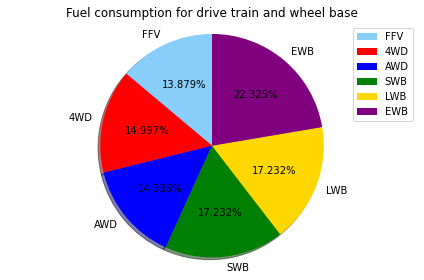

In [ ]:
# Pie chart
labels = drivetrain_labels
sizes =drive_train_measure2
# only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','purple'] 
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.3f%%',
        shadow=True, startangle=90,colors=colors)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.legend(labels,loc='best')
plt.title("Fuel consumption for drive train and wheel base")
plt.tight_layout()
plt.show()

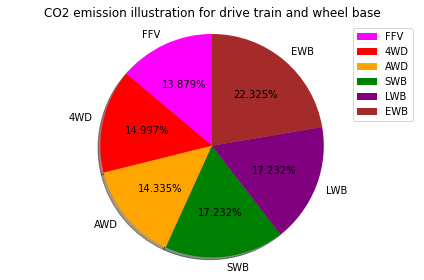

In [ ]:
# Pie chart
labels = drivetrain_labels
sizes =drive_train_measure2
# only "explode" the 2nd slice (i.e. 'Hogs')
colors = ['magenta', 'red', 'orange', 'green', 'purple','brown'] 
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.3f%%',
        shadow=True, startangle=90,colors=colors)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.legend(labels,loc='best')
plt.title("CO2 emission illustration for drive train and wheel base")
plt.tight_layout()
plt.show()

We can see that Four wheel drive (4WD) vehicles emit more co2 than All wheel drive (AWD) vehicles. 

## We want to know which fuel has the highest co2 emission

No handles with labels found to put in legend.


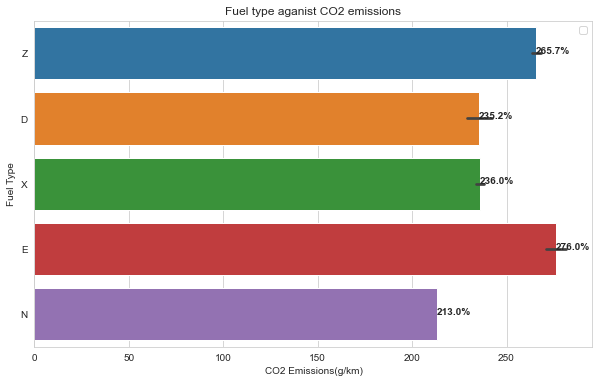

In [ ]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x="CO2 Emissions(g/km)", y='Fuel Type',data = df )
#ax.set_title("Pie chart approximation in Seaborn - Total Tip by Delivery Type", fontsize=15)
positions=["Z",'D','X',"E",'N']
labels=['premium gasoline','diesel','regular gasoline','ethanol (E85)','natural gas']
ax.set_xlabel ("CO2 Emissions(g/km)",)

for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )
plt.title('Fuel type aganist CO2 emissions')
plt.legend()

In [ ]:
model_labels

['ILX',
 'ILX HYBRID',
 'MDX 4WD',
 'RDX AWD',
 'RLX',
 'TL',
 'TL AWD',
 'TSX',
 '4C',
 'DB9',
 'RAPIDE',
 'V8 VANTAGE',
 'V8 VANTAGE S',
 'VANQUISH',
 'A4',
 'A4 QUATTRO',
 'A5 CABRIOLET QUATTRO',
 'A5 QUATTRO',
 'A6 QUATTRO',
 'A6 QUATTRO TDI (modified)',
 'A7 QUATTRO',
 'A7 QUATTRO TDI (modified)',
 'A8',
 'A8 TDI (modified)',
 'A8L',
 'A8L TDI (modified)',
 'ALLROAD QUATTRO',
 'Q5',
 'Q5 TDI (modified)',
 'Q5 HYBRID',
 'Q7',
 'Q7 TDI (modified)',
 'R8',
 'R8 SPYDER',
 'RS 5',
 'RS 5 CABRIOLET',
 'RS 7',
 'S4',
 'S5',
 'S5 CABRIOLET',
 'S6',
 'S7',
 'S8',
 'SQ5',
 'TT COUPE QUATTRO',
 'TT ROADSTER QUATTRO',
 'TTS COUPE QUATTRO',
 'TTS ROADSTER QUATTRO',
 'CONTINENTAL GT',
 'CONTINENTAL GTC',
 'CONTINENTAL GT SPEED CONVERTIBLE',
 'FLYING SPUR',
 'MULSANNE',
 '320i',
 '320i xDRIVE',
 '328d xDRIVE',
 '328d xDRIVE TOURING',
 '328i',
 '328i xDRIVE',
 '328i xDRIVE GRAN TURISMO',
 '328i xDRIVE TOURING',
 '335i',
 '335i xDRIVE',
 '335i xDRIVE GRAN TURISMO',
 '428i COUPE',
 '428i xDRIVE COU

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
#Get the shape of the dataset
df.shape

(7385, 12)

In [ ]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [ ]:
np.max(df[df.columns[-1]].values)

522

In [ ]:
# The maximum co2 emission for a vehicle from the dataset is 522g/km
# Lets see how many cylinders this particular vehicle has
df['Engine Size(L)'].values[np.argmax(df[df.columns[-1]].values)]

8.0

### we can see from above that the car with 8 cylinders has the highest CO2 emission

In [ ]:
#let do some more data cleaning
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


## We want to plot the make, vehicle class, cylinders, transmission and fuel type using bar chart

In [ ]:
def explore_cat_feature(feature):
    group=df.groupby(feature).mean()
    plt.figure(figsize=[15,5])
    plots=group['CO2 Emissions(g/km)'].sort_values().plot(kind='bar',fontsize=15)
    plt.xlabel(feature,fontsize=15)
    plt.ylabel('Mean Co2 Emission',fontsize=15)
  

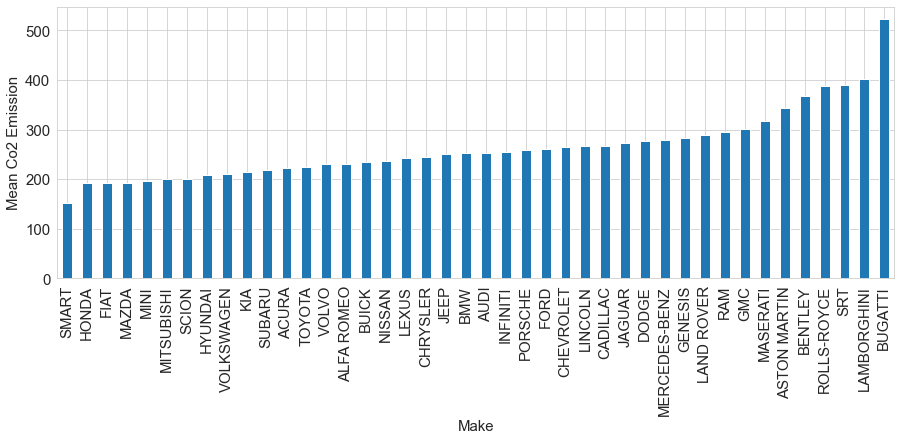

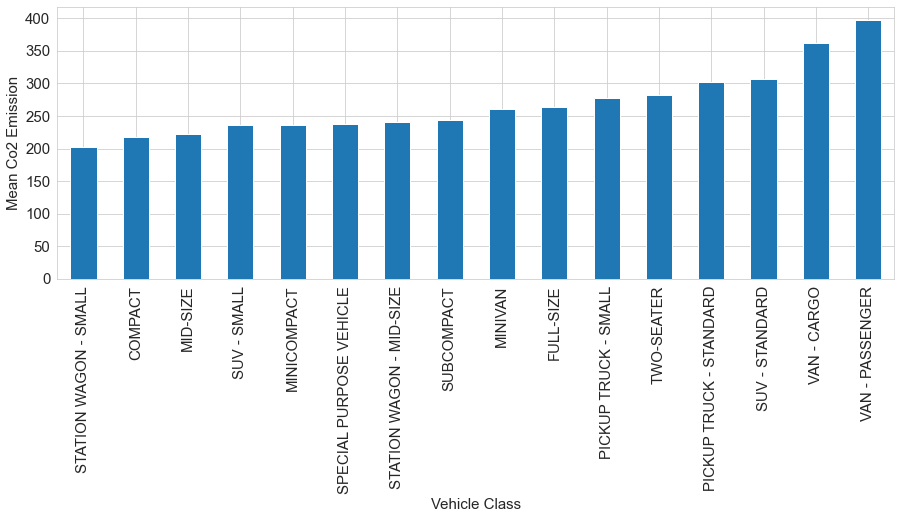

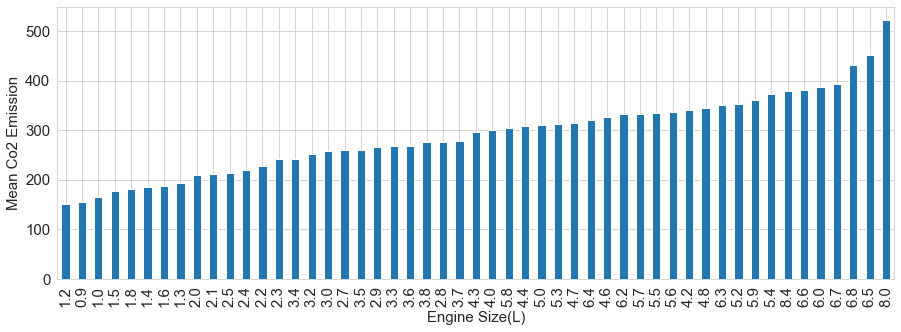

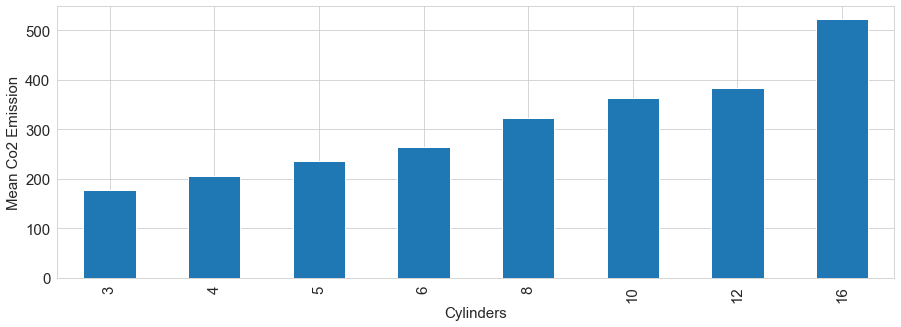

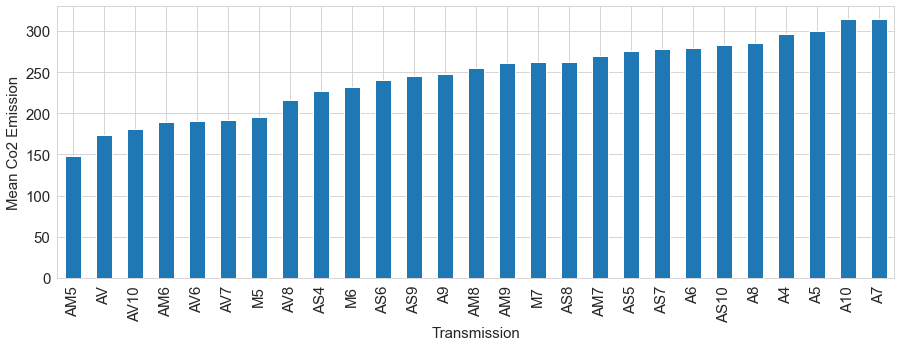

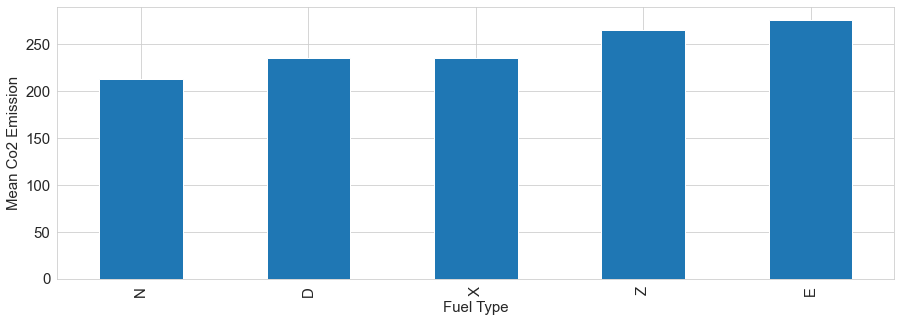

In [ ]:
#Explore how all the features affect the CO2 emission
for feature in ['Make','Vehicle Class', 
                'Engine Size(L)','Cylinders','Transmission','Fuel Type']:
    explore_cat_feature(feature)

### Clearly, we see that vehicle class, Engine size and Cylinders have a clear effect on increasing Co2 Emission

In [ ]:
df['Model'].value_counts()

F-150 FFV                  32
F-150 FFV 4X4              31
MUSTANG                    27
FOCUS FFV                  24
F-150 4X4                  20
                           ..
NSX                         1
Macan S                     1
Silverado LD 4WD            1
CX-5 (SIL)                  1
4RUNNER (Part-Time 4WD)     1
Name: Model, Length: 2053, dtype: int64

In [ ]:
def explore_num_feature(feature):
    plt.figure(figsize=[15,5])
    plt.scatter(df[feature],df['CO2 Emissions(g/km)'])
    plt.xlabel(feature,fontsize=15)
    plt.ylabel('Co2 Emission',fontsize=15)
    plt.title(" Co2 Emission vs. {}".format(feature),fontsize=20)

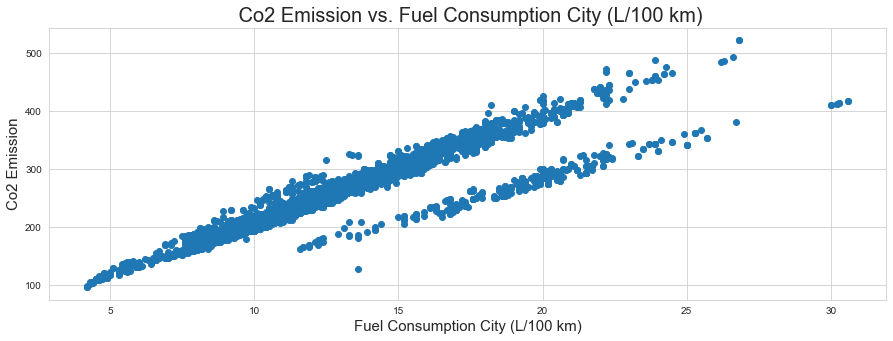

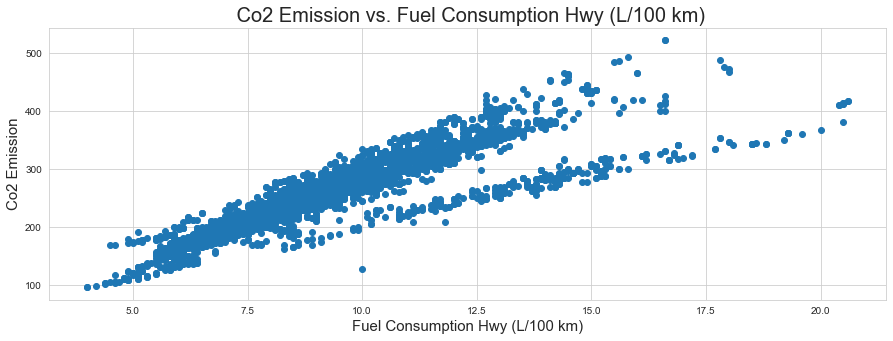

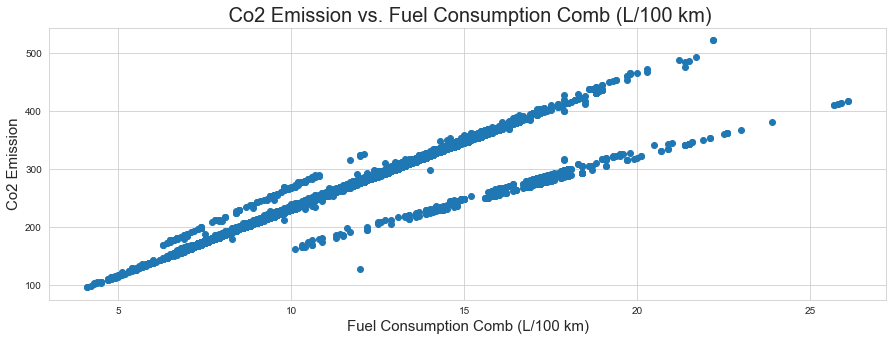

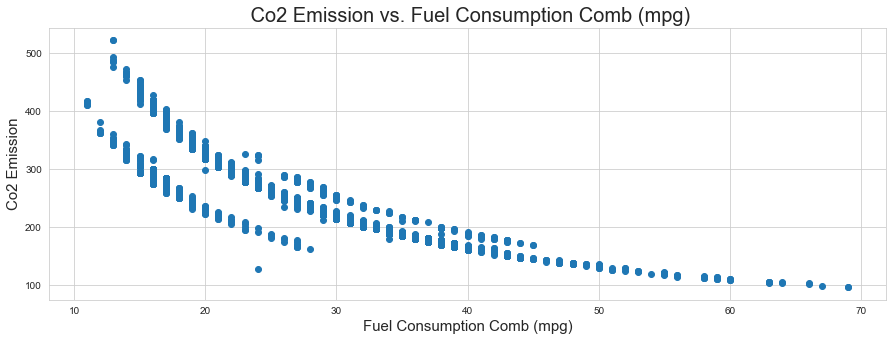

In [ ]:
for feature in ['Fuel Consumption City (L/100 km)', 
                'Fuel Consumption Hwy (L/100 km)', 
                'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']:
    explore_num_feature(feature)

## Modelling

In [ ]:
# lets drop all the unnecessary parameters
df2 = df.drop(['Make','Model','Vehicle Class',
               'Fuel Consumption City (L/100 km)', 
               'Transmission', 'Fuel Type', 'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (mpg)'],axis=1)
df2.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [ ]:
df2.shape

(6282, 4)

In [ ]:
x=df2.drop(['CO2 Emissions(g/km)'],axis=1)
y=df2["CO2 Emissions(g/km)"]

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## Random Forest Regression

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 4.1751 degrees.
Accuracy = 98.27%.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf1=RandomForestRegressor(random_state=42)
rf1.fit(X_train,y_train)
print('Training Accuracy: ',rf1.score(X_train,y_train))
print('Testing Accuracy: ',rf1.score(X_test,y_test))

Training Accuracy:  0.9898811794835988
Testing Accuracy:  0.9716591590111995


In [ ]:
evaluate(rf1,X_test,y_test)

Model Performance
Average Error: 4.1228 degrees.
Accuracy = 98.30%.


98.29774293684918

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)


Fitting 3 folds for each of 288 candidates, totalling 864 fits
Model Performance
Average Error: 4.3918 degrees.
Accuracy = 98.20%.


## we got a test accuracy of 97% using Random Forest Regression








In [ ]:
from sklearn.model_selection import cross_val_score
print('RandomForest Cross Validation: ' , cross_val_score(rf, x, y, cv=5))

RandomForest Cross Validation:  [0.92298413 0.96596499 0.97862733 0.97908151 0.9785231 ]


In [ ]:
from sklearn.model_selection import cross_val_score
print('RandomForest Cross Validation: ' , cross_val_score(rf1, x, y, cv=5))

RandomForest Cross Validation:  [0.92073261 0.96717025 0.97814764 0.97788856 0.97907729]


Benchmarking RandomForestRegressor(random_state=42)


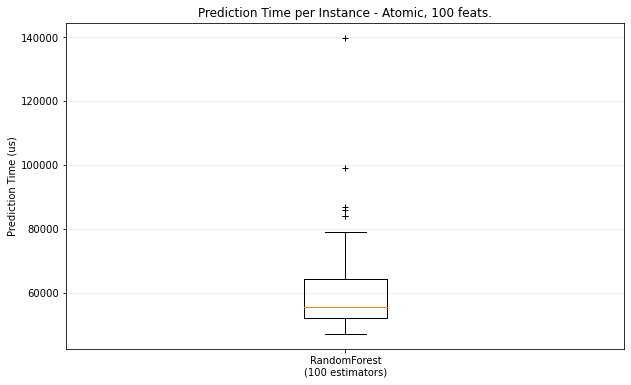

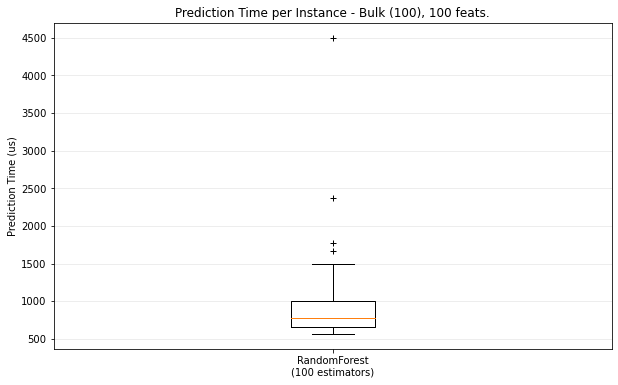

benchmarking with 100 features
benchmarking with 250 features
benchmarking with 500 features


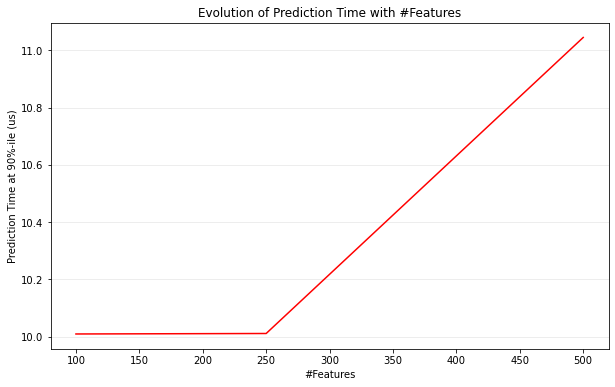

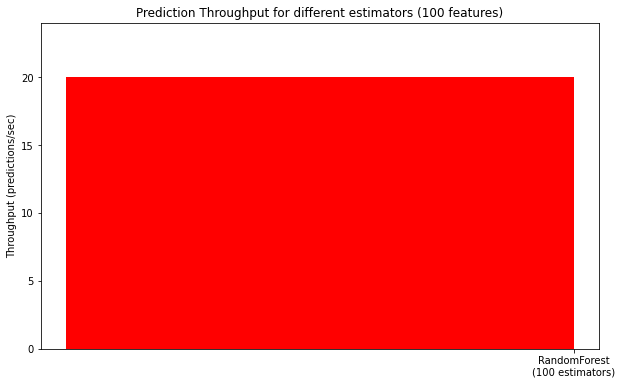

example run in 134.71s


In [ ]:
# Authors: Eustache Diemert <eustache@diemert.fr>
# License: BSD 3 clause

from collections import defaultdict

import time
import gc
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.utils import shuffle


def _not_in_sphinx():
    # Hack to detect whether we are running by the sphinx builder
    return '__file__' in globals()


def atomic_benchmark_estimator(estimator, X_test, verbose=False):
    """Measure runtime prediction of each instance."""
    n_instances = X_test.shape[0]
    runtimes = np.zeros(n_instances, dtype=float)
    for i in range(n_instances):
        instance = X_test[[i], :]
        start = time.time()
        estimator.predict(instance)
        runtimes[i] = time.time() - start
    if verbose:
        print("atomic_benchmark runtimes:", min(runtimes), np.percentile(
            runtimes, 50), max(runtimes))
    return runtimes


def bulk_benchmark_estimator(estimator, X_test, n_bulk_repeats, verbose):
    """Measure runtime prediction of the whole input."""
    n_instances = X_test.shape[0]
    runtimes = np.zeros(n_bulk_repeats, dtype=float)
    for i in range(n_bulk_repeats):
        start = time.time()
        estimator.predict(X_test)
        runtimes[i] = time.time() - start
    runtimes = np.array(list(map(lambda x: x / float(n_instances), runtimes)))
    if verbose:
        print("bulk_benchmark runtimes:", min(runtimes), np.percentile(
            runtimes, 50), max(runtimes))
    return runtimes


def benchmark_estimator(estimator, X_test, n_bulk_repeats=30, verbose=False):
    """
    Measure runtimes of prediction in both atomic and bulk mode.

    Parameters
    ----------
    estimator : already trained estimator supporting `predict()`
    X_test : test input
    n_bulk_repeats : how many times to repeat when evaluating bulk mode

    Returns
    -------
    atomic_runtimes, bulk_runtimes : a pair of `np.array` which contain the
    runtimes in seconds.

    """
    atomic_runtimes = atomic_benchmark_estimator(estimator, X_test, verbose)
    bulk_runtimes = bulk_benchmark_estimator(estimator, X_test, n_bulk_repeats,
                                             verbose)
    return atomic_runtimes, bulk_runtimes


def generate_dataset(n_train, n_test, n_features, noise=0.1, verbose=False):
    """Generate a regression dataset with the given parameters."""
    if verbose:
        print("generating dataset...")

    X, y, coef = make_regression(n_samples=n_train + n_test,
                                 n_features=n_features, noise=noise, coef=True)

    random_seed = 13
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=n_train, test_size=n_test, random_state=random_seed)
    X_train, y_train = shuffle(X_train, y_train, random_state=random_seed)

    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)

    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train[:, None])[:, 0]
    y_test = y_scaler.transform(y_test[:, None])[:, 0]

    gc.collect()
    if verbose:
        print("ok")
    return X_train, y_train, X_test, y_test


def boxplot_runtimes(runtimes, pred_type, configuration):
    """
    Plot a new `Figure` with boxplots of prediction runtimes.

    Parameters
    ----------
    runtimes : list of `np.array` of latencies in micro-seconds
    cls_names : list of estimator class names that generated the runtimes
    pred_type : 'bulk' or 'atomic'

    """

    fig, ax1 = plt.subplots(figsize=(10, 6))
    bp = plt.boxplot(runtimes, )

    cls_infos = ['%s\n(%d %s)' % (estimator_conf['name'],
                                  estimator_conf['complexity_computer'](
                                      estimator_conf['instance']),
                                  estimator_conf['complexity_label']) for
                 estimator_conf in configuration['estimators']]
    plt.setp(ax1, xticklabels=cls_infos)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')

    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)

    ax1.set_axisbelow(True)
    ax1.set_title('Prediction Time per Instance - %s, %d feats.' % (
        pred_type.capitalize(),
        configuration['n_features']))
    ax1.set_ylabel('Prediction Time (us)')

    plt.show()


def benchmark(configuration):
    """Run the whole benchmark."""
    X_train, y_train, X_test, y_test = generate_dataset(
        configuration['n_train'], configuration['n_test'],
        configuration['n_features'])

    stats = {}
    for estimator_conf in configuration['estimators']:
        print("Benchmarking", estimator_conf['instance'])
        estimator_conf['instance'].fit(X_train, y_train)
        gc.collect()
        a, b = benchmark_estimator(estimator_conf['instance'], X_test)
        stats[estimator_conf['name']] = {'atomic': a, 'bulk': b}

    cls_names = [estimator_conf['name'] for estimator_conf in configuration[
        'estimators']]
    runtimes = [1e6 * stats[clf_name]['atomic'] for clf_name in cls_names]
    boxplot_runtimes(runtimes, 'atomic', configuration)
    runtimes = [1e6 * stats[clf_name]['bulk'] for clf_name in cls_names]
    boxplot_runtimes(runtimes, 'bulk (%d)' % configuration['n_test'],
                     configuration)


def n_feature_influence(estimators, n_train, n_test, n_features, percentile):
    """
    Estimate influence of the number of features on prediction time.

    Parameters
    ----------

    estimators : dict of (name (str), estimator) to benchmark
    n_train : nber of training instances (int)
    n_test : nber of testing instances (int)
    n_features : list of feature-space dimensionality to test (int)
    percentile : percentile at which to measure the speed (int [0-100])

    Returns:
    --------

    percentiles : dict(estimator_name,
                       dict(n_features, percentile_perf_in_us))

    """
    percentiles = defaultdict(defaultdict)
    for n in n_features:
        print("benchmarking with %d features" % n)
        X_train, y_train, X_test, y_test = generate_dataset(n_train, n_test, n)
        for cls_name, estimator in estimators.items():
            estimator.fit(X_train, y_train)
            gc.collect()
            runtimes = bulk_benchmark_estimator(estimator, X_test, 30, False)
            percentiles[cls_name][n] = 1e6 * np.percentile(runtimes,
                                                           percentile)
    return percentiles


def plot_n_features_influence(percentiles, percentile):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    colors = ['r', 'g', 'b']
    for i, cls_name in enumerate(percentiles.keys()):
        x = np.array(sorted([n for n in percentiles[cls_name].keys()]))
        y = np.array([percentiles[cls_name][n] for n in x])
        plt.plot(x, y, color=colors[i], )
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)
    ax1.set_axisbelow(True)
    ax1.set_title('Evolution of Prediction Time with #Features')
    ax1.set_xlabel('#Features')
    ax1.set_ylabel('Prediction Time at %d%%-ile (us)' % percentile)
    plt.show()


def benchmark_throughputs(configuration, duration_secs=0.1):
    """benchmark throughput for different estimators."""
    X_train, y_train, X_test, y_test = generate_dataset(
        configuration['n_train'], configuration['n_test'],
        configuration['n_features'])
    throughputs = dict()
    for estimator_config in configuration['estimators']:
        estimator_config['instance'].fit(X_train, y_train)
        start_time = time.time()
        n_predictions = 0
        while (time.time() - start_time) < duration_secs:
            estimator_config['instance'].predict(X_test[[0]])
            n_predictions += 1
        throughputs[estimator_config['name']] = n_predictions / duration_secs
    return throughputs


def plot_benchmark_throughput(throughputs, configuration):
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['r', 'g', 'b']
    cls_infos = ['%s\n(%d %s)' % (estimator_conf['name'],
                                  estimator_conf['complexity_computer'](
                                      estimator_conf['instance']),
                                  estimator_conf['complexity_label']) for
                 estimator_conf in configuration['estimators']]
    cls_values = [throughputs[estimator_conf['name']] for estimator_conf in
                  configuration['estimators']]
    plt.bar(range(len(throughputs)), cls_values, width=0.5, color=colors)
    ax.set_xticks(np.linspace(0.25, len(throughputs) - 0.75, len(throughputs)))
    ax.set_xticklabels(cls_infos, fontsize=10)
    ymax = max(cls_values) * 1.2
    ax.set_ylim((0, ymax))
    ax.set_ylabel('Throughput (predictions/sec)')
    ax.set_title('Prediction Throughput for different estimators (%d '
                 'features)' % configuration['n_features'])
    plt.show()


# #############################################################################
# Main code

start_time = time.time()

# #############################################################################
# Benchmark bulk/atomic prediction speed for various regressors
configuration = {
    'n_train': int(1e3),
    'n_test': int(1e2),
    'n_features': int(1e2),
    'estimators': [
#         {'name': 'Linear Model',
#          'instance': SGDRegressor(penalty='elasticnet', alpha=0.01,
#                                   l1_ratio=0.25, tol=1e-4),
#          'complexity_label': 'non-zero coefficients',
#          'complexity_computer': lambda clf: np.count_nonzero(clf.coef_)},
        {'name': 'RandomForest',
         'instance': RandomForestRegressor(random_state =42),
         'complexity_label': 'estimators',
         'complexity_computer': lambda clf: clf.n_estimators},
#         {'name': 'SVR',
#          'instance': SVR(kernel='rbf'),
#          'complexity_label': 'support vectors',
#          'complexity_computer': lambda clf: len(clf.support_vectors_)},
    ]
}
benchmark(configuration)

# benchmark n_features influence on prediction speed
percentile = 90
percentiles = n_feature_influence({'ridge': Ridge()},
                                  configuration['n_train'],
                                  configuration['n_test'],
                                  [100, 250, 500], percentile)
plot_n_features_influence(percentiles, percentile)

# benchmark throughput
throughputs = benchmark_throughputs(configuration)
plot_benchmark_throughput(throughputs, configuration)

stop_time = time.time()
print("example run in %.2fs" % (stop_time - start_time))

In [ ]:
rf1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import cross_val_score
print('RandomForest Cross Validation: ' , cross_val_score(best_random, x, y, cv=5))

RandomForest Cross Validation:  [0.94407378 0.96906886 0.98147579 0.97904053 0.97851755]


In [ ]:
from sklearn.model_selection import cross_val_score
print('RandomForest Cross Validation: ' , cross_val_score(best_grid, x, y, cv=5))

## Saving the model

In [ ]:
import pickle

#name of the model
filename='vehicle_carbon_emission_model.sav'
pickle.dump(rf1,open(filename,'wb'))

## Load the model from disk and make predictions

In [ ]:
filename='vehicle_carbon_emission_model.sav'
loaded_model=pickle.load(open(filename,'rb'))
# lets see how the data looks like
test_data=np.expand_dims(X_test.values[0],axis=0)
test_data

array([[ 3.,  6., 12.]])

In [ ]:
import time
start_time =time.time()
prediction=loaded_model.predict(test_data)
end_time = time.time()
execution_time = end_time - start_time
print(execution_time)

0.08399248123168945


In [ ]:
#lets see our predictions
prediction

array([283.73440476])

## the model predicted that this vehicle would give an emission of 283.73g/km